In [88]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:
from pathlib import Path

if "workding_dir" not in locals():
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        workding_dir = "/content/drive/MyDrive/logical-reasoning/"
    except ModuleNotFoundError:
        workding_dir = str(Path.cwd().parent)

In [90]:
import os
import sys

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/projects/logical-reasoning


In [91]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/projects/logical-reasoning/.env


True

In [92]:
import os

model_name = os.getenv("MODEL_NAME")
data_path = os.getenv("LOGICAL_REASONING_DATA_PATH")
results_path = os.getenv("LOGICAL_REASONING_RESULTS_PATH")
max_new_tokens = int(os.getenv("MAX_NEW_TOKENS", 2048))

print(model_name, data_path, results_path, max_new_tokens)

shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat datasets/mgtv data/open_source_models_few_shots_results.csv 2048


In [93]:
from llm_toolkit.logical_reasoning_utils import *

In [94]:
model_orders = {
    "Mistral-7B-v0.3-Chinese-Chat": 5,
    "internlm2_5-7b-chat": 9,
    "internlm2_5-7b-chat-1m": 10,
    "Qwen2-7B-Instruct": 20,
    "Llama3.1-8B-Chinese-Chat": 30,
    "internlm2_5-20b-chat": 35,
    "Llama3.1-70B-Chinese-Chat": 40,
    "Qwen2-72B-Instruct": 50,
    "gpt-4o-mini": 60,
    "o1-mini": 65,
    "gpt-4o": 70,
    "o1-preview": 80,
}

In [99]:
markers = [
    "o",
    "x",
    "^",
    "s",
    "d",
    "P",
    "X",
    "*",
    "v",
    ">",
    "<",
    "p",
    "h",
    "H",
    "+",
    "|",
    "_",
]
model_markers = {k: markers[i] for i, k in enumerate(model_orders.keys())}

In [48]:
import pandas as pd

perf_df = None
model_perf_dfs = {}
for model_name in model_orders.keys():
    metrics_csv = f"data/{model_name}_shots_metrics.csv"
    if not Path(metrics_csv).exists():
        print(f"metrics file not found: {metrics_csv}")
        continue
    df = pd.read_csv(metrics_csv)
    model_perf_dfs[model_name] = df
    perf_df = df if perf_df is None else pd.concat([perf_df, df])

perf_df

shots                         model  \
0      0  Mistral-7B-v0.3-Chinese-Chat   
1     10  Mistral-7B-v0.3-Chinese-Chat   
0      0           internlm2_5-7b-chat   
1     10           internlm2_5-7b-chat   
0      0        internlm2_5-7b-chat-1m   
1     10        internlm2_5-7b-chat-1m   
0      0             Qwen2-7B-Instruct   
1     10             Qwen2-7B-Instruct   
0      0      Llama3.1-8B-Chinese-Chat   
1     10      Llama3.1-8B-Chinese-Chat   
0      0          internlm2_5-20b-chat   
0      0     Llama3.1-70B-Chinese-Chat   
0      0            Qwen2-72B-Instruct   

                                                 run  accuracy  precision  \
0  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/shot...  0.694667   0.701136   
1  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/shot...  0.603667   0.733491   
0              internlm/internlm2_5-7b-chat/shots-00  0.705000   0.739804   
1              internlm/internlm2_5-7b-chat/shots-10  0.553333   0.730174   
0           internlm/internlm2_5-7b-chat-1m/shots-00  0.481333   0.760525   
1           internlm/internlm2_5-7b-chat-1m/shots-10  0.647333   0.728207   
0                    Qwen/Qwen2-7B-Instruct/shots-00  0.683000   0.749310   
1                    Qwen/Qwen2-7B-Instruct/shots-10  0.564667   0.739120   
0     shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-00  0.742000   0.747706   
1     shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-10  0.667667   0.783408   
0             internlm/internlm2_5-20b-chat/shots-00  0.564000   0.774526   
0    shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-00  0.763667   0.780665   
0             Qwen/Qwen2-72B-Instruct_torch/shots-00  0.751667   0.794938   

     recall        f1  ratio_valid_classifications  
0  0.694667  0.663408                     0.011667  
1  0.603667  0.649319                     0.106333  
0  0.705000  0.690636                     1.000000  
1  0.553333  0.625097                     0.988333  
0  0.481333  0.524452                     0.998667  
1  0.647333  0.665825                     0.886667  
0  0.683000  0.710140                     0.999667  
1  0.564667  0.606405                     0.989667  
0  0.742000  0.737105                     0.803333  
1  0.667667  0.708261                     0.962333  
0  0.564000  0.635219                     0.672667  
0  0.763667  0.752581                     0.009667  
0  0.751667  0.757250                     0.977333

In [10]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator


def plot_perf(
    model_perf_dfs,
    model_markers,
    x_major_locator=5,
    y_offset=0.005,
    variant="shots"
):
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))

    for model_name, perf_df in model_perf_dfs.items():
        # Ensure the lengths of perf_df["epoch"], perf_df["accuracy"], and perf_df["f1"] are the same
        min_length = min(
            len(perf_df[variant]), len(perf_df["accuracy"]), len(perf_df["f1"])
        )
        perf_df = perf_df.iloc[:min_length]

        (line,) = ax.plot(
            perf_df[variant],
            perf_df["f1"],
            marker=model_markers[model_name],
            label=model_name,
        )

        line_color = line.get_color()

        best_f1 = perf_df["f1"].idxmax()
        print(
            f"Best F1 for {model_name} @ {perf_df[variant].iloc[best_f1]:.2f} {variant}: {perf_df['f1'].iloc[best_f1]}"
        )
        ax.annotate(
            f"{perf_df['f1'].iloc[best_f1]*100:.2f}%",
            (perf_df[variant].iloc[best_f1], perf_df["f1"].iloc[best_f1]),
            ha="center",
            va="bottom",
            xytext=(0, 0),
            textcoords="offset points",
            fontsize=10,
            color=line_color,
        )

    # Set y-axis limit
    y_scales = ax.get_ylim()
    ax.set_ylim(y_scales[0], y_scales[1] + y_offset)

    # Add title and labels
    ax.set_xlabel("Epoch (0: base model, 0.2 - 2: fine-tuned models)")
    ax.set_ylabel("F1 Score")

    # Set x-axis grid spacing to 0.2
    ax.xaxis.set_major_locator(MultipleLocator(x_major_locator))
    ax.set_title("Performance Analysis Across Checkpoints for Models")

    # Rotate x labels
    plt.xticks(rotation=0)
    plt.grid(True)
    # plt.tight_layout()

    # Set legend at the right to avoid overlapping with lines
    plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

    plt.show()

Best F1 for Mistral-7B-v0.3-Chinese-Chat @ 0.00 shots: 0.6634078645357937
Best F1 for internlm2_5-7b-chat @ 0.00 shots: 0.6906357423169466
Best F1 for internlm2_5-7b-chat-1m @ 10.00 shots: 0.665824871588245
Best F1 for Qwen2-7B-Instruct @ 0.00 shots: 0.710140098232232
Best F1 for Llama3.1-8B-Chinese-Chat @ 0.00 shots: 0.7371050181385632
Best F1 for Llama3.1-70B-Chinese-Chat @ 0.00 shots: 0.7525813484548423
Best F1 for Qwen2-72B-Instruct @ 0.00 shots: 0.7572499605227642


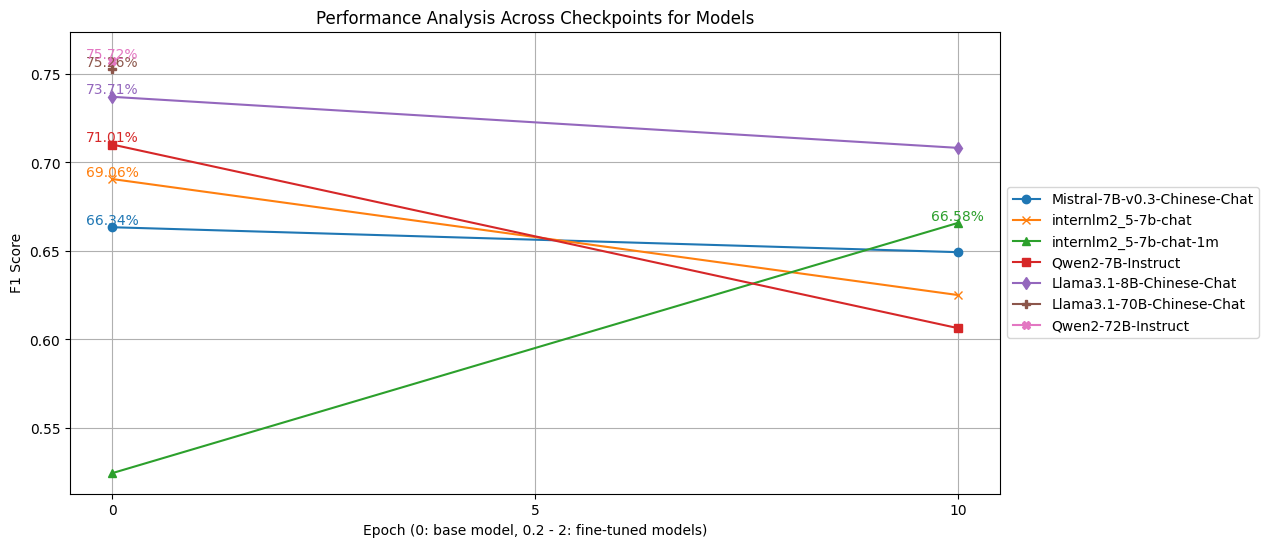

In [11]:
plot_perf(model_perf_dfs, model_markers)

In [49]:
from transformers import (
    AutoTokenizer,
)

from llm_toolkit.llm_utils import print_row_details

model_test_dfs = {}

for num_shots in [0, 5, 10, 20, 30, 40, 50]:
    for model_name in model_orders.keys():
        model_id = (
            model_perf_dfs[model_name]["run"].unique()[0].split(model_name)[0]
            + model_name
        )
        tokenizer = AutoTokenizer.from_pretrained(model_id, trust_remote_code=True)

        datasets = load_logical_reasoning_dataset(
            data_path,
            tokenizer=tokenizer,
            chinese_prompt=True,
            using_p1=False,
            num_shots=num_shots,
        )
        print(f"Model: {model_name}, Shots: {num_shots}")
        test_df = datasets["test"].to_pandas()
        test_df["num_tokens"] = test_df["prompt"].apply(
            lambda x: len(tokenizer(x)["input_ids"])
        )
        
        print(test_df["num_tokens"].describe())

        model_test_dfs[(model_name, num_shots)] = test_df

loading train/test data files
DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'answer', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'answer', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 3000
    })
})
Model: Mistral-7B-v0.3-Chinese-Chat, Shots: 0
count    3000.000000
mean      799.354000
std        15.567385
min       694.000000
25%       798.000000
50%       802.000000
75%       806.000000
max       928.000000
Name: num_tokens, dtype: float64
loading train/test data files
DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'answer', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'answer', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 3000
    })
})
Model: internlm2_5-7b-chat, Shots: 0
count    3000.000000
m

tokenizer_config.json:   0%|          | 0.00/2.51k [00:00<?, ?B/s]

tokenization_internlm2_fast.py:   0%|          | 0.00/7.80k [00:00<?, ?B/s]

tokenization_internlm2.py:   0%|          | 0.00/8.81k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/internlm/internlm2_5-20b-chat:
- tokenization_internlm2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/internlm/internlm2_5-20b-chat:
- tokenization_internlm2_fast.py
- tokenization_internlm2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer.model:   0%|          | 0.00/1.48M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/713 [00:00<?, ?B/s]

loading train/test data files


Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'answer', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'answer', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 3000
    })
})
Model: internlm2_5-20b-chat, Shots: 0
count    3000.000000
mean      461.917667
std         7.767732
min       426.000000
25%       459.000000
50%       461.000000
75%       463.000000
max       511.000000
Name: num_tokens, dtype: float64
loading train/test data files
DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'answer', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'answer', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 3000
    })
})
Model: Llama3.1-70B-Chinese-Chat, Shots: 0
count    3000.000000
mean      571.091000
std         

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'answer', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'answer', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 3000
    })
})
Model: internlm2_5-20b-chat, Shots: 5
count    3000.000000
mean     1301.917667
std         7.767732
min      1266.000000
25%      1299.000000
50%      1301.000000
75%      1303.000000
max      1351.000000
Name: num_tokens, dtype: float64
loading train/test data files
DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'answer', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'answer', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 3000
    })
})
Model: Llama3.1-70B-Chinese-Chat, Shots: 5
count    3000.000000
mean     1737.091000
std         

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'answer', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'answer', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 3000
    })
})
Model: internlm2_5-20b-chat, Shots: 10
count    3000.000000
mean     2195.917667
std         7.767732
min      2160.000000
25%      2193.000000
50%      2195.000000
75%      2197.000000
max      2245.000000
Name: num_tokens, dtype: float64
loading train/test data files
DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'answer', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'answer', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 3000
    })
})
Model: Llama3.1-70B-Chinese-Chat, Shots: 10
count    3000.000000
mean     2833.091000
std       

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'answer', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'answer', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 3000
    })
})
Model: internlm2_5-20b-chat, Shots: 20
count    3000.000000
mean     4015.917667
std         7.767732
min      3980.000000
25%      4013.000000
50%      4015.000000
75%      4017.000000
max      4065.000000
Name: num_tokens, dtype: float64
loading train/test data files
DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'answer', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'answer', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 3000
    })
})
Model: Llama3.1-70B-Chinese-Chat, Shots: 20
count    3000.000000
mean     5202.091000
std       

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'answer', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'answer', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 3000
    })
})
Model: internlm2_5-20b-chat, Shots: 30
count    3000.000000
mean     5853.917667
std         7.767732
min      5818.000000
25%      5851.000000
50%      5853.000000
75%      5855.000000
max      5903.000000
Name: num_tokens, dtype: float64
loading train/test data files
DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'answer', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'answer', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 3000
    })
})
Model: Llama3.1-70B-Chinese-Chat, Shots: 30
count    3000.000000
mean     7687.091000
std       

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'answer', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'answer', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 3000
    })
})
Model: internlm2_5-20b-chat, Shots: 40
count    3000.000000
mean     7659.917667
std         7.767732
min      7624.000000
25%      7657.000000
50%      7659.000000
75%      7661.000000
max      7709.000000
Name: num_tokens, dtype: float64
loading train/test data files
DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'answer', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'answer', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 3000
    })
})
Model: Llama3.1-70B-Chinese-Chat, Shots: 40
count     3000.000000
mean     10136.091000
std     

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'answer', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'answer', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 3000
    })
})
Model: internlm2_5-20b-chat, Shots: 50
count    3000.000000
mean     9511.917667
std         7.767732
min      9476.000000
25%      9509.000000
50%      9511.000000
75%      9513.000000
max      9561.000000
Name: num_tokens, dtype: float64
loading train/test data files
DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'answer', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'answer', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 3000
    })
})
Model: Llama3.1-70B-Chinese-Chat, Shots: 50
count     3000.000000
mean     12638.091000
std     

In [76]:
import tiktoken


def num_tokens_from_text(text, model="gpt-4o"):
    """Return the number of tokens used by a list of messages."""
    try:
        encoding = tiktoken.encoding_for_model(model)
    except KeyError:
        # print("Warning: model not found. Using cl100k_base encoding.")
        encoding = tiktoken.get_encoding("cl100k_base")

    return len(encoding.encode(text))


def num_tokens_from_row(row, num_shots, train_dataset, model="gpt-4o"):
    prompt = get_few_shot_prompt_template(
        num_shots, train_dataset
    )
    text = prompt.format(row["puzzle"], row["truth"], row["text"])
    return num_tokens_from_text(text, model=model)

In [77]:
for num_shots in [0, 5, 10, 20, 30, 40, 50]:
    for model_name in ["gpt-4o", "gpt-4o-mini", "o1-preview", "o1-mini"]:

        datasets = load_logical_reasoning_dataset(
            data_path,
        )
        print(f"Model: {model_name}, Shots: {num_shots}")
        test_df = datasets["test"].to_pandas()
        # print_row_details(test_df)
        test_df["num_tokens"] = test_df.apply(
            lambda x: num_tokens_from_row(x, num_shots, datasets["train"].to_pandas(), model=model_name), axis=1
        )
        print(test_df["num_tokens"].describe())

        model_test_dfs[(model_name, num_shots)] = test_df

loading train/test data files
DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'answer', 'title', 'puzzle', 'truth'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'answer', 'title', 'puzzle', 'truth'],
        num_rows: 3000
    })
})
Model: gpt-4o, Shots: 0
count    3000.000000
mean      524.806333
std        10.057595
min       464.000000
25%       522.000000
50%       525.000000
75%       528.250000
max       606.000000
Name: num_tokens, dtype: float64
loading train/test data files
DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'answer', 'title', 'puzzle', 'truth'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'answer', 'title', 'puzzle', 'truth'],
        num_rows: 3000
    })
})
Model: gpt-4o-mini, Shots: 0
count    3000.000000
mean      524.806333
std        10.057595
min       464.000000
25%       522.000000
50%       525.000000
75%       528.250000
m

In [79]:
df_token_counts = pd.DataFrame(
    model_test_dfs.keys(), columns=["model_name", "num_shots"]
)

max = []
min = []
mean = []
std = []

for model_name, num_shots in model_test_dfs.keys():
    test_df = model_test_dfs[(model_name, num_shots)]
    max.append(test_df["num_tokens"].max())
    min.append(test_df["num_tokens"].min())
    mean.append(test_df["num_tokens"].mean())
    std.append(test_df["num_tokens"].std())

df_token_counts["max"] = max
df_token_counts["min"] = min
df_token_counts["mean"] = mean
df_token_counts["std"] = std

df_token_counts.head(10)

model_name  num_shots   max   min         mean        std
0  Mistral-7B-v0.3-Chinese-Chat          0   928   694   799.354000  15.567385
1           internlm2_5-7b-chat          0   511   426   461.917667   7.767732
2        internlm2_5-7b-chat-1m          0   511   426   461.917667   7.767732
3             Qwen2-7B-Instruct          0   517   426   465.338667   8.617118
4      Llama3.1-8B-Chinese-Chat          0   652   512   571.091000   9.115687
5          internlm2_5-20b-chat          0   511   426   461.917667   7.767732
6     Llama3.1-70B-Chinese-Chat          0   652   512   571.091000   9.115687
7            Qwen2-72B-Instruct          0   517   426   465.338667   8.617118
8  Mistral-7B-v0.3-Chinese-Chat          5  2573  2339  2444.354000  15.567385
9           internlm2_5-7b-chat          5  1351  1266  1301.917667   7.767732

In [98]:
df_token_counts

model_name  num_shots    max    min          mean  \
0   Mistral-7B-v0.3-Chinese-Chat          0    928    694    799.354000   
1            internlm2_5-7b-chat          0    511    426    461.917667   
2         internlm2_5-7b-chat-1m          0    511    426    461.917667   
3              Qwen2-7B-Instruct          0    517    426    465.338667   
4       Llama3.1-8B-Chinese-Chat          0    652    512    571.091000   
..                           ...        ...    ...    ...           ...   
79                       o1-mini         40  15061  14818  14933.595333   
80                        gpt-4o         50  12476  12334  12394.806333   
81                   gpt-4o-mini         50  12476  12334  12394.806333   
82                    o1-preview         50  18760  18517  18632.595333   
83                       o1-mini         50  18760  18517  18632.595333   

          std  
0   15.567385  
1    7.767732  
2    7.767732  
3    8.617118  
4    9.115687  
..        ...  
79  16.417250  
80  10.057595  
81  10.057595  
82  16.417250  
83  16.417250  

[84 rows x 6 columns]

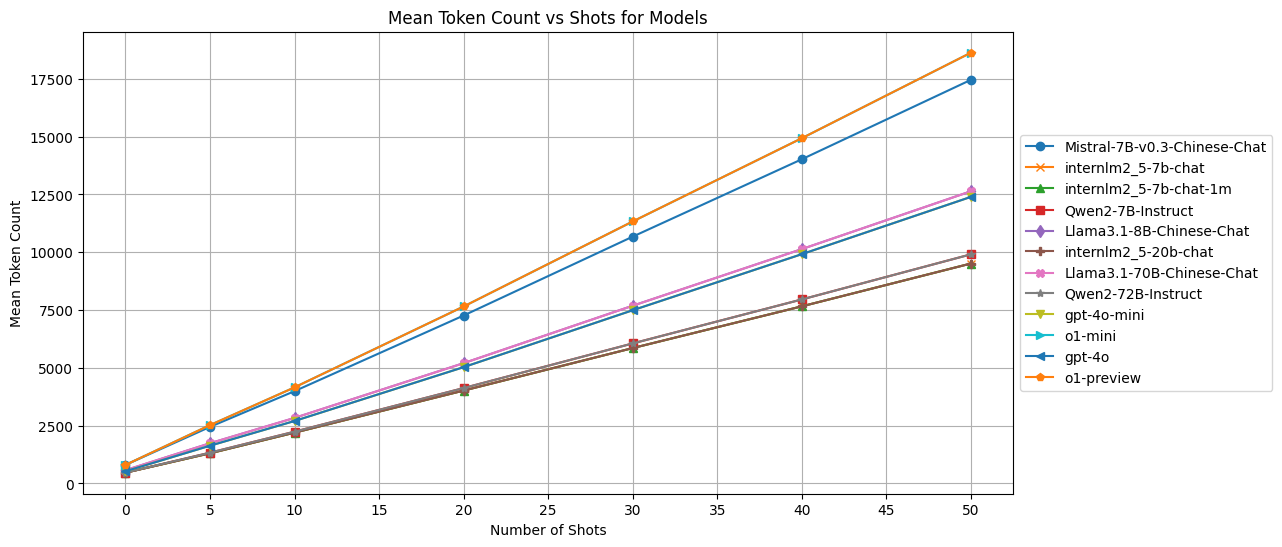

In [100]:
# plot mean/std of token counts vs shots for each model
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

for model_name in model_orders.keys():
    model_df = df_token_counts[df_token_counts["model_name"] == model_name]
    # ax.errorbar(
    #     model_df["num_shots"],
    #     model_df["mean"],
    #     yerr=model_df["std"],
    #     marker=model_markers[model_name],
    #     label=model_name,
    #     fmt='o',  # Format of the marker
    #     capsize=5,  # Length of the error bar caps
    #     capthick=2,  # Thickness of the error bar caps
    #     elinewidth=2,  # Thickness of the error bars
    # )

    # Connect mean dots with lines
    ax.plot(
        model_df["num_shots"],
        model_df["mean"],
        marker=model_markers[model_name],
        label=model_name,
    )

# Add title and labels
ax.set_xlabel("Number of Shots")
ax.set_ylabel("Mean Token Count")
ax.set_title("Mean Token Count vs Shots for Models")

# Set x-axis grid spacing to 5
ax.xaxis.set_major_locator(MultipleLocator(5))

# Rotate x labels
plt.xticks(rotation=0)
plt.grid(True)
# plt.tight_layout()

# Set legend at the right to avoid overlapping with lines
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

plt.show()

In [101]:
df_token_counts.to_csv("data/all_model_token_counts.csv", index=False)

In [14]:
for col, f1, accuracy in zip(df.columns[5:], perf_df["f1"].to_list(), perf_df["accuracy"].to_list()):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(df, col, title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})")

In [15]:
for col, f1, accuracy in zip(
    df.columns[5:], perf_df["f1"].to_list(), perf_df["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(df, col, title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})", preprocess_func=extract_answer)